In [3]:
import os
import cv2
import glob
import random
import warnings
import numpy as np
from PIL import Image
import disarray as da
import seaborn as sns
import tensorflow as tf
from imutils import paths
from tensorflow.keras.utils import load_img, img_to_array
from itertools import cycle
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

In [4]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
base_path = '/home/sanjeev/ML_Dataset/microsoft_dataset/asm_img/'

In [6]:
cur_dir = os.getcwd()
os.chdir(base_path)

In [7]:
cur_dir

'/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_reserch'

In [8]:
img_list = glob.glob(os.path.join(base_path, '*/*.png'))

In [9]:
len(img_list)

10868

In [10]:
categories = os.listdir(base_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels))

In [11]:
cur_dir = os.getcwd()
os.chdir(base_path)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family

for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.png'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
fam = []
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
        fam.append(list_fams[label])
    label += 1
num_classes = label

Label: 0	Family: .ipynb_checkpoints	Number of images: 0
Label: 1	Family:           Gatak	Number of images: 1013
Label: 2	Family:    Kelihos_ver1	Number of images: 398
Label: 3	Family:    Kelihos_ver3	Number of images: 2942
Label: 4	Family:        Lollipop	Number of images: 2478
Label: 5	Family:  Obfuscator.ACY	Number of images: 1228
Label: 6	Family:          Ramnit	Number of images: 1541
Label: 7	Family:           Simda	Number of images: 42
Label: 8	Family:          Tracur	Number of images: 751
Label: 9	Family:           Vundo	Number of images: 475


In [12]:
y

array([1., 1., 1., ..., 9., 9., 9.])

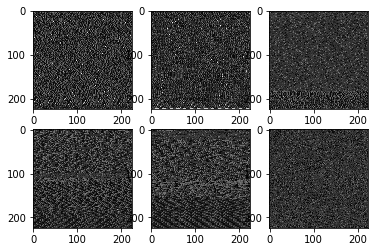

In [13]:
# Sample images from dataset
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [14]:
# width, height, channels = (224, 224, 3) #image input shape
# X = np.zeros((num_samples, width, height, channels))
# cnt = 0
# paths_list = []
# print("Processing images...")
# for i in range(len(list_fams)):
#     for img_file in glob.glob(list_fams[i]+'/*.png'):
#         paths_list.append(os.path.join(os.getcwd(),img_file))
#         img = load_img(img_file, target_size=(224, 224))
#         x = img_to_array(img) #image to array
#         x = np.expand_dims(x, axis=0)
#         x = preprocess_input(x)
#         X[cnt] = x
#         cnt += 1
# print("Images processed: %d" %(cnt))

In [15]:
X=np.load("/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_reserch/features/processed_images_asm.npy")

In [16]:
X.shape

(10868, 224, 224, 3)

In [17]:
features_asm=np.load('/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_reserch/features/MobileNetV1_feat_asm_microsoft_1024.npy')

In [18]:
features_asm.shape

(10868, 1024)

In [21]:
bytes_features=np.load('/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_reserch/features/MobileNetV1_feat_bytes_microsoft_1024.npy')

In [22]:
bytes_features.shape

(10868, 1024)

In [23]:
fused_features = np.concatenate([features_asm, bytes_features], axis=1)
print(f"Fused features shape: {fused_features.shape}")  # Should be (samples, 2048)

Fused features shape: (10868, 2048)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(fused_features, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
print(X_train.shape),
print(y_train.shape),
print(X_test.shape),
print(y_test.shape)

(8694, 2048)
(8694,)
(2174, 2048)
(2174,)


In [26]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 8694
Testing samples: 2174


## MLPClassifier

In [27]:
import pandas as pd
import disarray as da
from sklearn import tree
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, matthews_corrcoef, roc_curve, auc

In [28]:
%%time
clf = MLPClassifier(random_state=31, max_iter=700)

CPU times: user 21 µs, sys: 34 µs, total: 55 µs
Wall time: 75.3 µs


In [30]:
%%time
clf.fit(X_train,y_train)

CPU times: user 22min 43s, sys: 21min 8s, total: 43min 51s
Wall time: 42 s


MLPClassifier(max_iter=700, random_state=31)

In [77]:
%%time
print("training Accuracy:", round((clf.score(X_train, y_train) * 100), 2))

Testing Accuracy: 77.72
CPU times: user 660 ms, sys: 701 ms, total: 1.36 s
Wall time: 1.37 s


In [31]:
%%time
print("Testing Accuracy:", round((clf.score(X_test, y_test) * 100), 2))

Testing Accuracy: 96.5
CPU times: user 1.5 s, sys: 1.74 s, total: 3.24 s
Wall time: 52.4 ms


In [32]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 654 ms, sys: 583 ms, total: 1.24 s
Wall time: 20 ms


In [33]:
%%time
ls = precision_recall_fscore_support(y_test, y_pred, average='micro')
print(int(round(ls[0]*100, 0)), int(round(ls[1]*100, 0)), int(round(ls[2]*100, 0)))

97 97 97
CPU times: user 305 ms, sys: 433 ms, total: 737 ms
Wall time: 11.9 ms


In [34]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       203
         2.0       0.96      0.96      0.96        80
         3.0       1.00      0.99      1.00       590
         4.0       0.98      0.96      0.97       505
         5.0       0.92      0.95      0.93       240
         6.0       0.95      0.93      0.94       315
         7.0       0.38      0.75      0.50         4
         8.0       0.88      0.92      0.90       144
         9.0       0.96      0.98      0.97        93

    accuracy                           0.97      2174
   macro avg       0.89      0.94      0.91      2174
weighted avg       0.97      0.97      0.97      2174



In [38]:
# GridSearchCV

In [39]:
%%time
# Perform cross-validation and grid search to find the best hyperparameters
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

CPU times: user 12 µs, sys: 12 µs, total: 24 µs
Wall time: 43.6 µs


In [40]:
%%time
gs = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
gs.fit(X_train, y_train)

CPU times: user 8min 13s, sys: 7min 53s, total: 16min 7s
Wall time: 5min 37s


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=700, random_state=31),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [41]:
print("Best hyperparameters:", gs.best_params_)

Best hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [78]:

%%time
print("Accuracy on testing set: {:.3f}".format(gs.score(X_test, y_test)))

Accuracy on testing set: 0.964
CPU times: user 649 ms, sys: 742 ms, total: 1.39 s
Wall time: 35.1 ms


In [43]:
%%time
y_pred = gs.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       203
         2.0       0.96      0.95      0.96        80
         3.0       0.99      1.00      1.00       588
         4.0       0.97      0.97      0.97       496
         5.0       0.96      0.92      0.94       246
         6.0       0.93      0.96      0.94       308
         7.0       1.00      0.38      0.55         8
         8.0       0.89      0.88      0.89       150
         9.0       0.92      0.97      0.94        95

    accuracy                           0.96      2174
   macro avg       0.96      0.89      0.91      2174
weighted avg       0.96      0.96      0.96      2174

CPU times: user 1.37 s, sys: 1.64 s, total: 3.02 s
Wall time: 81.7 ms


In [44]:
list_fams = sorted(label_dict.keys())

In [46]:
list_fams

['.ipynb_checkpoints',
 'Gatak',
 'Kelihos_ver1',
 'Kelihos_ver3',
 'Lollipop',
 'Obfuscator.ACY',
 'Ramnit',
 'Simda',
 'Tracur',
 'Vundo']

In [50]:
#list_fams.pop(0)

'.ipynb_checkpoints'

In [51]:
classification_metrices = metrics.classification_report(y_test, y_pred, output_dict=True, target_names= list_fams)
df = pd.DataFrame(classification_metrices).transpose()
df.to_csv('/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_reserch/features/MobileNetV1_MLP_st.csv')

In [52]:
df

,precision,recall,f1-score,support
Gatak,1.000000,1.000000,1.000000,203.000000
Kelihos_ver1,0.962025,0.950000,0.955975,80.000000
Kelihos_ver3,0.993232,0.998299,0.995759,588.000000
Lollipop,0.967807,0.969758,0.968781,496.000000
Obfuscator.ACY,0.957627,0.918699,0.937759,246.000000
Ramnit,0.930599,0.957792,0.944000,308.000000
Simda,1.000000,0.375000,0.545455,8.000000
Tracur,0.891892,0.880000,0.885906,150.000000
Vundo,0.920000,0.968421,0.943590,95.000000
accuracy,0.963661,0.963661,0.963661,0.963661


Plotting the confusion matrix


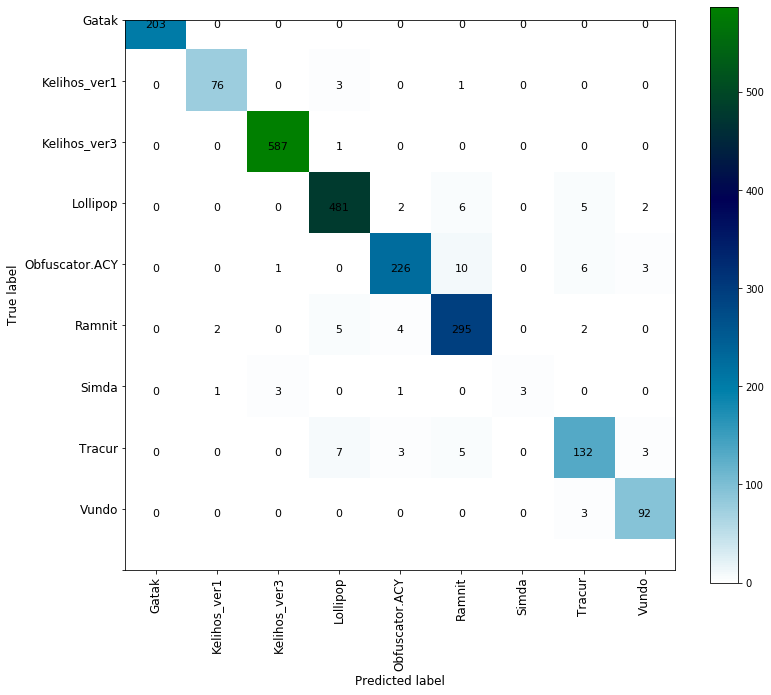

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Plotting the confusion matrix")
conf_mat = np.around(conf_matrix, decimals=2)  
figure = plt.gcf()
figure.set_size_inches(11, 10)
plt.imshow(conf_mat, interpolation='nearest', cmap='ocean_r')

for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]), xy=(col,row), ha='center', va='top', fontsize=11)
        
plt.xticks(range(len(list_fams)), list_fams, rotation=90, fontsize=12)
plt.yticks(range(len(list_fams)+1), list_fams, fontsize=12)

plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.tight_layout()
plt.colorbar()
plt.savefig('/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_reserch/features/MobileNetV1_MLP_asm.eps', bbox_inches='tight')
plt.savefig('/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_reserch/features/MobileNetV1_MLP_asm.png', bbox_inches='tight')

plt.show()

In [54]:
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm)

In [55]:
pd.set_option('display.max_columns', None)  # force to display any number of columns.

In [56]:
#calculating true positives, false positives, true negatives and false negatives from confusion matrix
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

In [57]:
FP, FN, TP, TN

(array([ 0,  3,  4, 16, 10, 22,  0, 16,  8]),
 array([ 0,  4,  1, 15, 20, 13,  5, 18,  3]),
 array([203,  76, 587, 481, 226, 295,   3, 132,  92]),
 array([1971, 2091, 1582, 1662, 1918, 1844, 2166, 2008, 2071]))

In [58]:
#calculating false_omission_rate
NPV = TN/(TN+FN)
FOR = 1-NPV
FOR

array([0.        , 0.00190931, 0.00063171, 0.00894454, 0.01031992,
       0.00700054, 0.00230309, 0.0088845 , 0.00144648])

In [59]:
data = df.da.export_metrics(metrics_to_include=['true_positive_rate', 'true_negative_rate', 'false_positive_rate', 
                                              'false_negative_rate', 'false_discovery_rate'])

In [60]:
for num, fam in zip(range(25), list_fams):
    data.rename(columns={data.columns[num]:fam}, inplace=True)

data1 = data.drop(columns=['micro-average'])
data1 = data1.T
# data.drop(df.tail(1).index,inplace=True)

data1['false_omission_rate'] = list(FOR)

data1

,true_positive_rate,true_negative_rate,false_positive_rate,false_negative_rate,false_discovery_rate,false_omission_rate
Gatak,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Kelihos_ver1,0.950000,0.998567,0.001433,0.050000,0.037975,0.001909
Kelihos_ver3,0.998299,0.997478,0.002522,0.001701,0.006768,0.000632
Lollipop,0.969758,0.990465,0.009535,0.030242,0.032193,0.008945
Obfuscator.ACY,0.918699,0.994813,0.005187,0.081301,0.042373,0.010320
Ramnit,0.957792,0.988210,0.011790,0.042208,0.069401,0.007001
Simda,0.375000,1.000000,0.000000,0.625000,0.000000,0.002303
Tracur,0.880000,0.992095,0.007905,0.120000,0.108108,0.008885
Vundo,0.968421,0.996152,0.003848,0.031579,0.080000,0.001446


In [61]:
for i in data1:
    print('Average of', i, '-->', round((np.average(data1[i])*100), 4))

Average of true_positive_rate --> 89.0886
Average of true_negative_rate --> 99.5309
Average of false_positive_rate --> 0.4691
Average of false_negative_rate --> 10.9114
Average of false_discovery_rate --> 4.1869
Average of false_omission_rate --> 0.4604


In [62]:
#MCC value
print('MCC Score:', round(matthews_corrcoef(y_test, y_pred), 2))

MCC Score: 0.96


In [63]:
print("micro_precision :", metrics.precision_score(y_test, y_pred, average='micro'))
print("micro_recall :", metrics.recall_score(y_test, y_pred, average='micro'))
print("micro_f1_score :", metrics.f1_score(y_test, y_pred, average='micro'))

micro_precision : 0.9636614535418583
micro_recall : 0.9636614535418583
micro_f1_score : 0.9636614535418583


In [64]:
print("macro_precision :", metrics.precision_score(y_test, y_pred, average='macro'))
print("macro_recall :", metrics.recall_score(y_test, y_pred, average='macro'))
print("macro_f1_score :", metrics.f1_score(y_test, y_pred, average='macro'))

macro_precision : 0.958131371957089
macro_recall : 0.8908855368510751
macro_f1_score : 0.9085805662631325


In [65]:
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))  
y_test = enc.transform(y_test.reshape(-1, 1))
y_pred = enc.transform(y_pred.reshape(-1, 1))

In [66]:
y_test = y_test.toarray()
y_pred = y_pred.toarray()

In [67]:
n_classes = 9

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

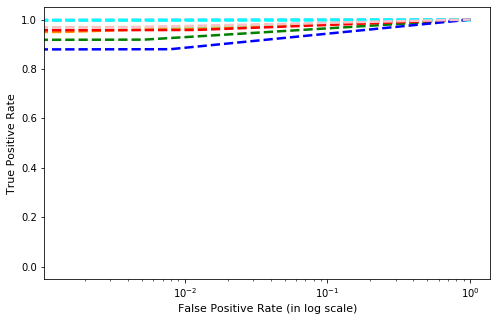

In [68]:
# Compute macro-average ROC curve and ROC area

n_classes = 9
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2.5   # line width
plt.figure(figsize=(8,5))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen', 'green', 'red', 'cyan', 'blue', 
                 'pink', 'purple', 'brown', 'coral', 'chocolate', 'indigo', 'navy'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linestyle='dashed', lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xscale("log")
plt.xlabel('False Positive Rate (in log scale)', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.savefig("/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_reserch/features/MobileNetV1_MLP_st.eps", bbox_inches='tight')
plt.savefig("/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_reserch/features/MobileNetV1_MLP_st.png", bbox_inches='tight')

plt.show()

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "Naive Bayes": GaussianNB()
}


In [71]:
results = {}

In [73]:
y = y.astype(int)

In [74]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    fused_features, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


=== Training KNN ===
Accuracy: 0.9365 (93.65%)
Training Time: 0.023 sec
Prediction Time: 1.118 sec
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       203
           2       0.96      0.96      0.96        80
           3       0.99      1.00      0.99       588
           4       0.88      0.96      0.92       496
           5       0.98      0.85      0.91       246
           6       0.90      0.90      0.90       308
           7       0.00      0.00      0.00         8
           8       0.85      0.76      0.80       150
           9       0.91      0.97      0.94        95

    accuracy                           0.94      2174
   macro avg       0.83      0.82      0.83      2174
weighted avg       0.93      0.94      0.93      2174



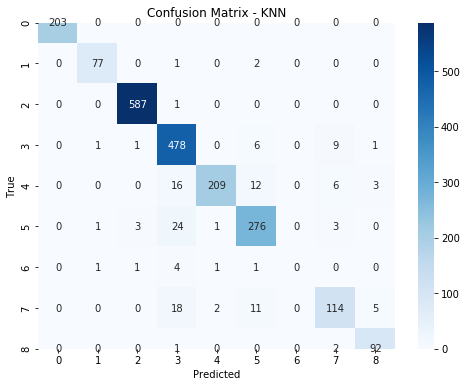


=== Training SVM (RBF) ===
Accuracy: 0.9494 (94.94%)
Training Time: 101.606 sec
Prediction Time: 10.527 sec
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       203
           2       0.99      0.94      0.96        80
           3       1.00      1.00      1.00       588
           4       0.91      0.97      0.94       496
           5       0.95      0.89      0.92       246
           6       0.92      0.96      0.94       308
           7       0.00      0.00      0.00         8
           8       0.90      0.74      0.81       150
           9       0.87      0.98      0.92        95

    accuracy                           0.95      2174
   macro avg       0.84      0.83      0.83      2174
weighted avg       0.95      0.95      0.95      2174



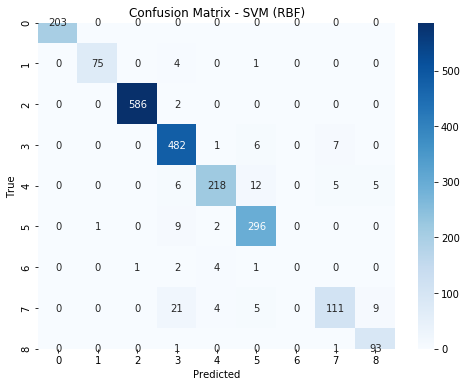


=== Training Random Forest ===
Accuracy: 0.9480 (94.80%)
Training Time: 35.386 sec
Prediction Time: 0.122 sec
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       203
           2       1.00      0.89      0.94        80
           3       1.00      1.00      1.00       588
           4       0.90      0.97      0.94       496
           5       0.96      0.87      0.92       246
           6       0.89      0.97      0.93       308
           7       0.00      0.00      0.00         8
           8       0.92      0.77      0.84       150
           9       0.93      0.97      0.95        95

    accuracy                           0.95      2174
   macro avg       0.85      0.83      0.83      2174
weighted avg       0.95      0.95      0.95      2174



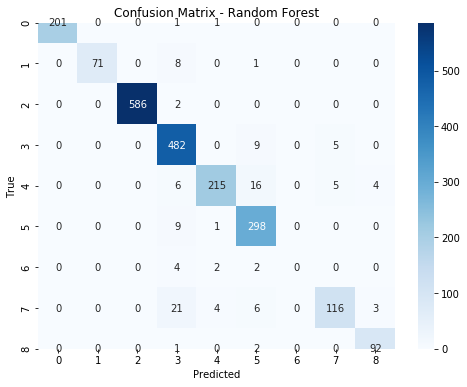


=== Training Extra Trees ===
Accuracy: 0.9540 (95.40%)
Training Time: 10.503 sec
Prediction Time: 0.152 sec
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       203
           2       1.00      0.93      0.96        80
           3       1.00      1.00      1.00       588
           4       0.91      0.98      0.94       496
           5       0.98      0.88      0.93       246
           6       0.90      0.97      0.94       308
           7       0.00      0.00      0.00         8
           8       0.91      0.80      0.85       150
           9       0.97      0.95      0.96        95

    accuracy                           0.95      2174
   macro avg       0.85      0.83      0.84      2174
weighted avg       0.95      0.95      0.95      2174



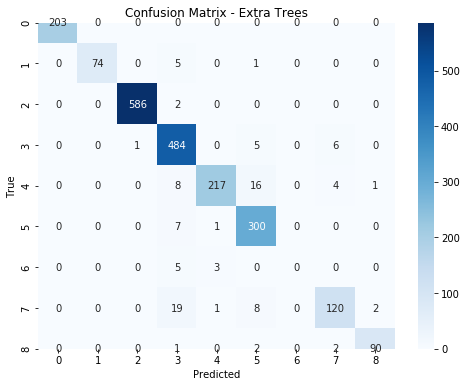


=== Training Naive Bayes ===
Accuracy: 0.7461 (74.61%)
Training Time: 0.116 sec
Prediction Time: 0.296 sec
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.95      0.97       203
           2       0.97      0.76      0.85        80
           3       1.00      0.98      0.99       588
           4       0.81      0.66      0.73       496
           5       0.83      0.78      0.81       246
           6       0.74      0.27      0.40       308
           7       0.03      0.12      0.05         8
           8       0.25      0.70      0.36       150
           9       0.62      0.86      0.72        95

    accuracy                           0.75      2174
   macro avg       0.69      0.68      0.65      2174
weighted avg       0.83      0.75      0.76      2174



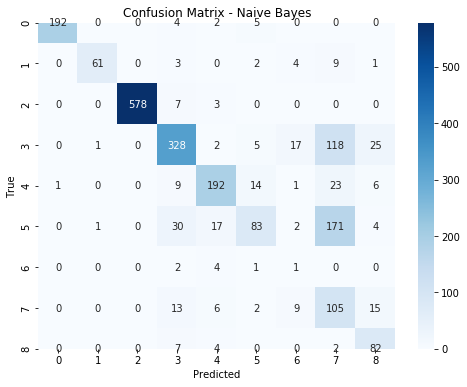

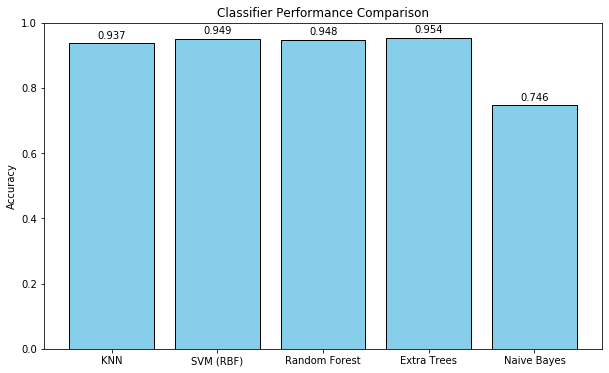


=== Training & Prediction Times ===
               Training Time (s)  Prediction Time (s)
KNN                     0.023031             1.118137
SVM (RBF)             101.606333            10.526930
Random Forest          35.386379             0.121513
Extra Trees            10.502967             0.151600
Naive Bayes             0.116041             0.295511


In [76]:
import time

results = {}
timings = {}

for name, clf in classifiers.items():
    print(f"\n=== Training {name} ===")
    
    # Training time
    start_train = time.time()
    clf.fit(X_train, y_train)
    end_train = time.time()
    train_time = end_train - start_train
    
    # Prediction time
    start_pred = time.time()
    y_pred = clf.predict(X_test)
    end_pred = time.time()
    pred_time = end_pred - start_pred
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    timings[name] = (train_time, pred_time)
    
    print(f"Accuracy: {acc:.4f} ({acc*100:.2f}%)")
    print(f"Training Time: {train_time:.3f} sec")
    print(f"Prediction Time: {pred_time:.3f} sec")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ===== Compare Accuracies =====
plt.figure(figsize=(10,6))
methods = list(results.keys())
accuracies = list(results.values())
bars = plt.bar(methods, accuracies, color='skyblue', edgecolor='black')
plt.title("Classifier Performance Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.01,
             f"{acc:.3f}", ha='center', va='bottom')

plt.show()

# ===== Compare Training & Prediction Times =====
timing_df = pd.DataFrame(timings, index=["Training Time (s)", "Prediction Time (s)"]).T
print("\n=== Training & Prediction Times ===")
print(timing_df)
